In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sklearn.metrics as metrics
from sklearn.datasets import load_breast_cancer

In [9]:
#load in the dataset from sklearn library
cancer_data = load_breast_cancer()

#bring in cancer dataset as data and target
cancer_X = cancer_data.data
cancer_y = cancer_data.target

#split the cancer datasets (train and test)
cancer_X_train, cancer_X_test, cancer_Y_train, cancer_Y_test = train_test_split(cancer_X, cancer_y, test_size=0.2, random_state=42)

#create cancer dataframe from dataset
cancer_df = pd.DataFrame(cancer_X_train, columns=cancer_data.feature_names)
cancer_df['target'] = cancer_Y_train

In [10]:
#initialize the scaler function
scaler = StandardScaler()

#scale the cancer dataframe
cancer_df[cancer_data.feature_names] = scaler.fit_transform(cancer_df[cancer_data.feature_names])

In [11]:
#PCA
from sklearn.decomposition import PCA
pca_components = [1, 2, 5, 6, 7, 8, 9, 10, 20, 30]

for n in pca_components:
  pca = PCA(n_components=n)
  cancer_X_train_pca = pca.fit_transform(cancer_df[cancer_data.feature_names])
  cancer_X_test_pca = pca.transform(cancer_df[cancer_data.feature_names])

  classifier = SVC(kernel='linear')
  classifier.fit(cancer_df[cancer_data.feature_names], cancer_Y_train)

  cancer_predictions = classifier.predict(cancer_df[cancer_data.feature_names])
  cfn_matrix_cancer = confusion_matrix(cancer_df['target'], cancer_predictions)
print(cfn_matrix_cancer)
print(classification_report(cancer_df['target'], cancer_predictions))

[[166   3]
 [  3 283]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       169
           1       0.99      0.99      0.99       286

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



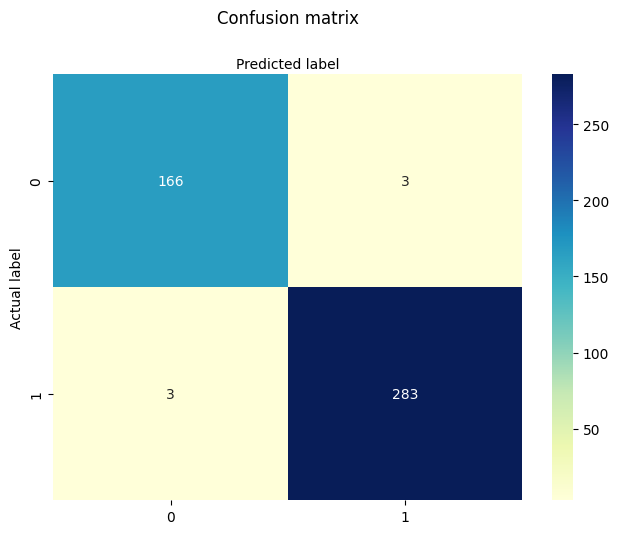

In [12]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heat map
sb.heatmap(pd.DataFrame(cfn_matrix_cancer), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [13]:
print('Accuracy:\t',metrics.accuracy_score(cancer_df['target'], cancer_predictions))
print('Precision:\t',metrics.precision_score(cancer_df['target'], cancer_predictions))
print('Recall: \t',metrics.recall_score(cancer_df['target'], cancer_predictions))
print('F1 Score:\t',metrics.f1_score(cancer_df['target'], cancer_predictions))

Accuracy:	 0.9868131868131869
Precision:	 0.9895104895104895
Recall: 	 0.9895104895104895
F1 Score:	 0.9895104895104895


Compared to the basic logisitc regression that was done in homework 3, the results here seem to be considerably better. In the previous homework, all of the metrics were somewhere around the upper 60 percent range, while these are all in the very high 90 percent range.

In [14]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(cancer_X_train, cancer_Y_train)
svc_linear_predictions = svc_linear.predict(cancer_X_test)
cfn_matrix_svc_linear = confusion_matrix(cancer_Y_test, svc_linear_predictions)
print(cfn_matrix_svc_linear)

[[39  4]
 [ 1 70]]


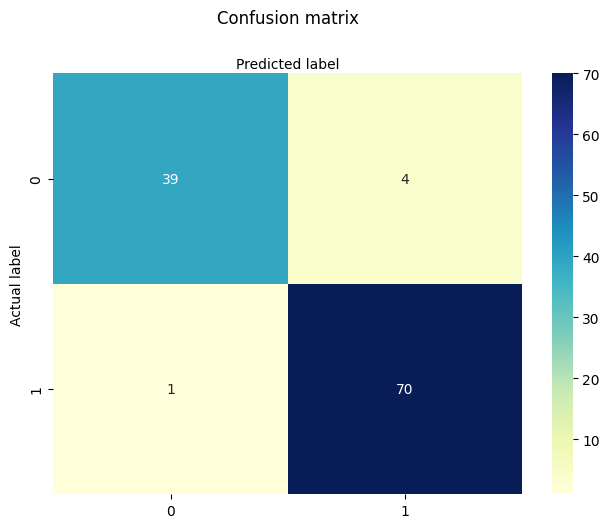

In [15]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heat map
sb.heatmap(pd.DataFrame(cfn_matrix_svc_linear), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [16]:
print('Accuracy:\t',metrics.accuracy_score(cancer_Y_test, svc_linear_predictions))
print('Precision:\t',metrics.precision_score(cancer_Y_test, svc_linear_predictions))
print('Recall: \t',metrics.recall_score(cancer_Y_test, svc_linear_predictions))
print('F1 Score:\t',metrics.f1_score(cancer_Y_test, svc_linear_predictions))

Accuracy:	 0.956140350877193
Precision:	 0.9459459459459459
Recall: 	 0.9859154929577465
F1 Score:	 0.9655172413793104


In [17]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(cancer_X_train, cancer_Y_train)
svc_rbf_predictions = svc_rbf.predict(cancer_X_test)
cfn_matrix_svc_rbf = confusion_matrix(cancer_Y_test, svc_rbf_predictions)
print(cfn_matrix_svc_rbf)

[[37  6]
 [ 0 71]]


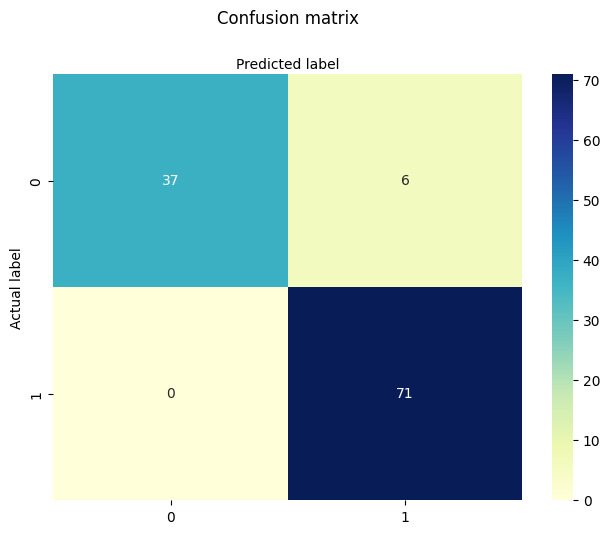

In [18]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heat map
sb.heatmap(pd.DataFrame(cfn_matrix_svc_rbf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [19]:
print('Accuracy:\t',metrics.accuracy_score(cancer_Y_test, svc_rbf_predictions))
print('Precision:\t',metrics.precision_score(cancer_Y_test, svc_rbf_predictions))
print('Recall: \t',metrics.recall_score(cancer_Y_test, svc_rbf_predictions))
print('F1 Score:\t',metrics.f1_score(cancer_Y_test, svc_rbf_predictions))

Accuracy:	 0.9473684210526315
Precision:	 0.922077922077922
Recall: 	 1.0
F1 Score:	 0.9594594594594594


In [20]:
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
df = pd.read_csv(url)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
housing_X = df.drop(columns=['price'])
housing_Y = df['price']

#changing string values to appropriate numeric values
binaryColumns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
def binaryMap(x):
  return x.map({'yes': 1, 'no': 0})

housing_X['furnishingstatus'] = housing_X['furnishingstatus'].replace({
    'furnished': 3,
    'semi-furnished': 2,
    'unfurnished': 1
})

housing_X[binaryColumns] = housing_X[binaryColumns].apply(binaryMap)
housing_X.head()

housing_X_train, housing_X_test, housing_Y_train, housing_Y_test = train_test_split(housing_X, housing_Y, test_size=0.2, random_state=42)


<ipython-input-21-28430169892d>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_X['furnishingstatus'] = housing_X['furnishingstatus'].replace({


In [30]:
pca_components = [1, 2, 5, 6, 7, 8, 9, 10, 12]
for n in pca_components:
  pca = PCA(n_components=n)
  housing_X_train_pca = pca.fit_transform(housing_X_train)
  housing_X_test_pca = pca.transform(housing_X_test)

  regressor = SVR(kernel='linear',)
  regressor.fit(housing_X_train_pca, housing_Y_train)

  housing_predictions = regressor.predict(housing_X_test_pca)

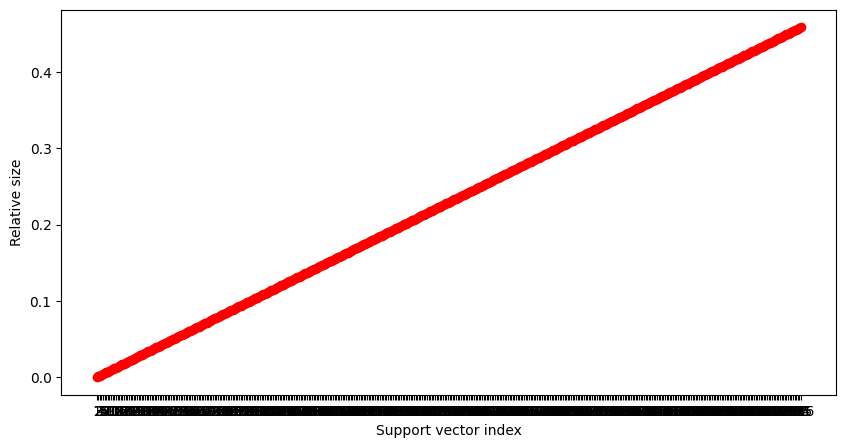

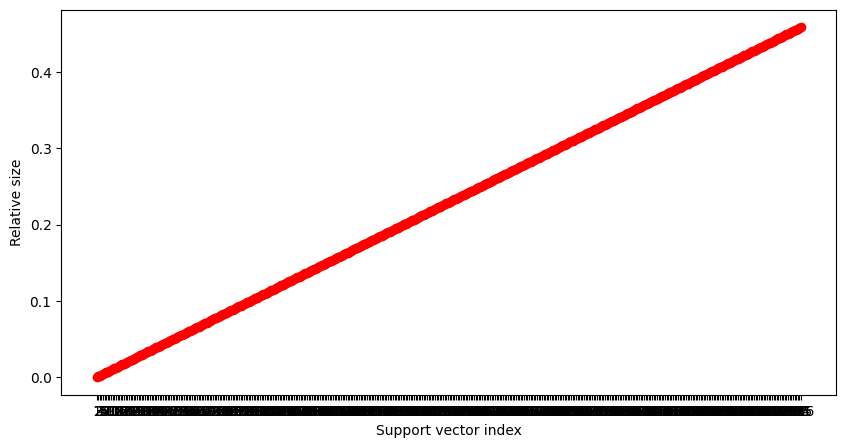

In [31]:
#plot the training error
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(regressor.support_vectors_) + 1), regressor.support_
         / regressor.support_.sum() *
         100, 'o-', linewidth=2, color='red')
plt.xticks(range(1, len(regressor.support_vectors_) + 1))
plt.xlabel('Support vector index')
plt.ylabel('Relative size')
plt.show()

#plot the testing error
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(regressor.support_vectors_) + 1), regressor.support_
         / regressor.support_.sum() *
         100, 'o-', linewidth=2, color='red')
plt.xticks(range(1, len(regressor.support_vectors_) + 1))
plt.xlabel('Support vector index')
plt.ylabel('Relative size')
plt.show()
